***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [7. Observing Systems](7_0_introduction.ipynb)  
    * Previous: [7.6 Polarization and Antenna Feeds](7_6_polarization.ipynb)
    * Next: [7.8 Radio Frequency Interference (RFI)](7_8_rfi.ipynb)
    
***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [7]:
import scipy.signal
from IPython.display import Image
import matplotlib.image as mpimg

# This section uses the optional slimscat package (https://krosenfeld.github.io/slimscat/current/)
try:
    from slimscat import slimscat
    doExample = True
except ImportError:
    print('Warning: could not import slimscat, will not run example')
    doExample = False

## 7.7 Propagation effects <a id='instrum:sec:propagation'></a><!--\label{instrum:sec:propagation}-->


Cosmic radio waves go through a variety of ionized and neutral media before measurement at a radio telescope. Some effects are negliable and/or easily corrected for. Others, however, can prevent any useful astrophysical inference at all, regardless of the sensitivity of the telescope. This section will provide a brief overview of the dominant sources of signal corruption in the troposphere, ionosphere and interstellar media. 

### 7.7.1 Interstellar medium <a id='instrum:sec:ism'></a><!--\label{instrum:sec:ism}-->

The interstellar medium is filled with plasma that is not uniformly distributed. This plasma causes radio waves to scatter, and thus causes astrophysical sources to scintillate (vary in apparent brightness) - increasingly so at low frequency. Here we cover some basic scattering theory, which is of course applicable to the other astrophysical media discussed here. 

An electro-magnetic wave passing through any medium with *refractive index inhomogeneity* will cause the wave to scatter. This effect is most commonly modeled as a thin screen (relative the to the distance to the source) perpendicular to the line-of-sight, which adds a random phase offset to the incoming wave at each transverse point, yielding what can be viewed as a 'corrugated' (not flat) wavefront. 

![](figures/corrugatedPhaseScreen.png)

**Figure 7.7.1**: Schematic diagram showing scattering of a plane wave due to a irregular slab of plasma. As can be imagined, we would *expect* to measure a constant phase across the radio telescope array; instead, our measurement will now include a stochastic phase corruption caused by differing refractive indices at various parts of the plane (Image credit: Sanjay Bhatnagar PhD Thesis <a id='instrum:fig:corrugatedPhaseScreen'></a><!--\label{instrum:fig:corrugatedPhaseScreen-->


The degree of corrugation can be described by the phase structure function:

$$D_\phi (\mathbf{x},\mathbf{x'}) =\ < ( \phi(\mathbf{x} +\mathbf{x'}) - \phi(\mathbf{x}))^2>,$$

where $\mathbf{x}$ and $\mathbf{x'} $ represent two points on the screen.
Assuming isotropy (i.e. no directional dependence), power law turbulence simplifies the expression to

$$D_{\phi} (r) =  (r/r_{\rm diff})^{\beta},\ \  (r^2 = \mathbf{x}^2 -\mathbf{x'}^2),$$


where $r_{\rm diff}$, is the distance on the phase screen where the mean phase difference is equal to 1 radian. The exponent of $\beta = 5/3$ is characteristic of Kolmogorov turbulence, which is a good approximation for the ISM and troposphere in many circumstances (empirically verified, see Thompson et al. 2001, and refernce therein). 

Another important length scale is the Fresnel scale, defined as the distance across the phase screen where the geometrical path difference is $1/2$ radian, $r_{\rm F} = \sqrt{\lambda D/2\pi}$, where $D$ is the distance between the observer and the scattering screen. These two length scales, $r_{\rm F}$ and $r_{\rm diff}$, define the nature of the scattering, which is split into the \emph{strong} and \emph{weak} regimes. In *weak scattering*, $ r_{\rm diff} \gg r_{\rm F}$ and hence, $D_{\phi}(r_{\rm F}) \ll 1$. In *strong scattering*, $ r_{\rm diff} \ll r_{\rm F}$ implying  $D_{\phi}(r_{\rm F}) \gg 1$. 

Assuming we have a "frozen screen", where micro-scale diffusion within the scattering screen is much smaller than the bulk motion, the structure function becomes  $D(R)=D(t)|_{R=v T}$ where $v$ is the scattering screen transverse velocity and T is the integration time. This assumption consists of assuming that the structure of the screen changes much, much slower than the time taken for the screen to move across the telescope's field of view. This allows the structure function to be parameterised in terms of the screen's bulk velocity, rather than position. This has a number of advantages, as will become clear. 

These length- and time- scales determine a wide range of scattering effects in radio imaging, which are summarized in Figure 7.7.2. A full treatment of these is not our aim here, but Table 7.7.1 provides indicative values for a range of media, which can then be plugged into the *ScatterBrane* software below to test different regimes and gain a more intuitive understanding. The additional reading section at the end of the chapter will provide further references for more in-depth explanations. 

<img src='figures/scattering_table.png' width=70%>

**Table 7.7.1**: Typical values of scattering media in astronomy (Credit: Narayan 1992) <a id='instrum:fig:scattering_table'></a><!--\label{instrum:fig:scattering_table}-->

![](figures/scattering_imaging.png)

**Figure 7.7.2.** Different imaging regimes in the presence of scattering, shown as function of the integration time and Fresnel time ($t_{\rm F} = r_{\rm F}/v$) on the vertical axis and the strength of the scattering shown on the horizontal axis. These regimes can be explored using the *ScatterBrane* code below in combination with typical values from Table 7.7.1. (Credit: Narayan 1992) <a id='instrum:fig:scattering_imaging'></a><!--\label{instrum:fig:scattering_imaging}-->

The following code is taken from the [SLIMSCAT &#10142;](https://krosenfeld.github.io/slimscat/current/) package, courtesy of Michael Johnson and Katherine Rosenfeld. Changing the input parameter values and input image will give a more intuitive understanding of scattering effects in the different imaging regimes shown in Figure 7.7.2. 

In [8]:
if doExample:
    
    # construct gaussian source
    nx,ny = 220,256
    yy,xx = np.meshgrid(np.arange(ny)-ny/2,np.arange(nx)-nx/2,indexing='ij')
    isrc = np.exp(-0.5*(xx**2 + yy**2) / (0.07*np.min([nx,ny]))**2)
    
    slimscat.generate_screen(screenfile='gaussian_screen.bin')
    
    # scatter source
    iss = slimscat.run_slimscat(isrc,1.,screenfile='gaussian_screen.bin')

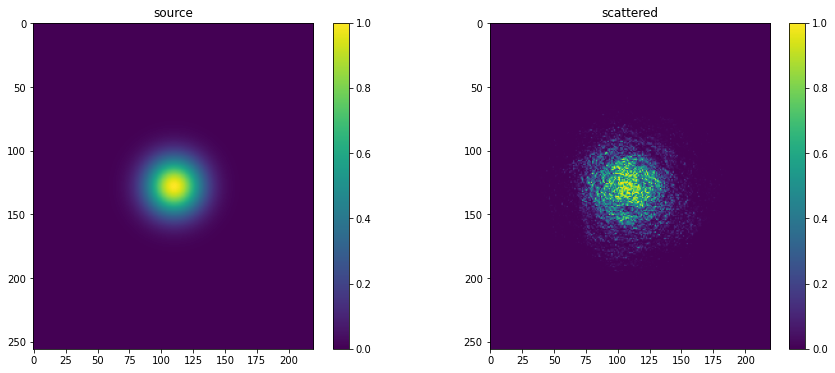

In [9]:
if doExample:
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(121)
    plt.imshow(isrc,vmin=isrc.min(),vmax=isrc.max())
    plt.title('source')
    plt.colorbar()
    
    plt.subplot(122)
    plt.imshow(iss,vmin=isrc.min(),vmax=isrc.max())
    plt.title('scattered')
    plt.colorbar()

**Figure 7.7.3.** Example of the effect of strong scattering on a Gaussian source.

As we can see, scattering causes a significant degradation of the quality of the observations. The author recommends playing around with all the (hidden) input parameters of *slimscat.generate_screen* and *slimscat.run_slimscat* functions; for more information see [the slimscat webpage &#10142;](http://krosenfeld.github.io/slimscat). We finish with one of their fun examples, which is scattering Gargantua from the movie *Interstellar*. While this is simply illustrative, it is a real observational challenge faced by researchers trying to image the shadow of the black hole at the centre of our Galaxy. Our example will be done for three colour filters.

In [10]:
if doExample:
    # generate scattering file
    slimscat.generate_screen(wavelength=0.87e-6,dx=0.2,ips=4,screenfile='gargantua_screen.bin')
    # load RGB image with rough scale appropriate for Sgr A*
    model = mpimg.imread('figures/gargantua.jpg')
    dx = 50/300.
    nx,ny,nchan = model.shape
    
    # scatter each rgb channel separately (using same screen)
    r = slimscat.run_slimscat(model[:,:,0],dx,screenfile='gargantua_screen.bin')
    g = slimscat.run_slimscat(model[:,:,1],dx,screenfile='gargantua_screen.bin')
    b = slimscat.run_slimscat(model[:,:,2],dx,screenfile='gargantua_screen.bin')

Following the scattering, we need to smooth the image a little to better illustrate the result:

In [11]:
if doExample:
    N=5
    t = 1 - np.abs(np.linspace(-1, 1, N))
    kernel = t.reshape(N, 1) * t.reshape(1, N)
    kernel /= kernel.sum()
    rs = scipy.signal.convolve2d(r/255., kernel, mode='same')
    gs = scipy.signal.convolve2d(g/255., kernel, mode='same')
    bs = scipy.signal.convolve2d(b/255., kernel, mode='same')

Make the RGB cube and you're done:

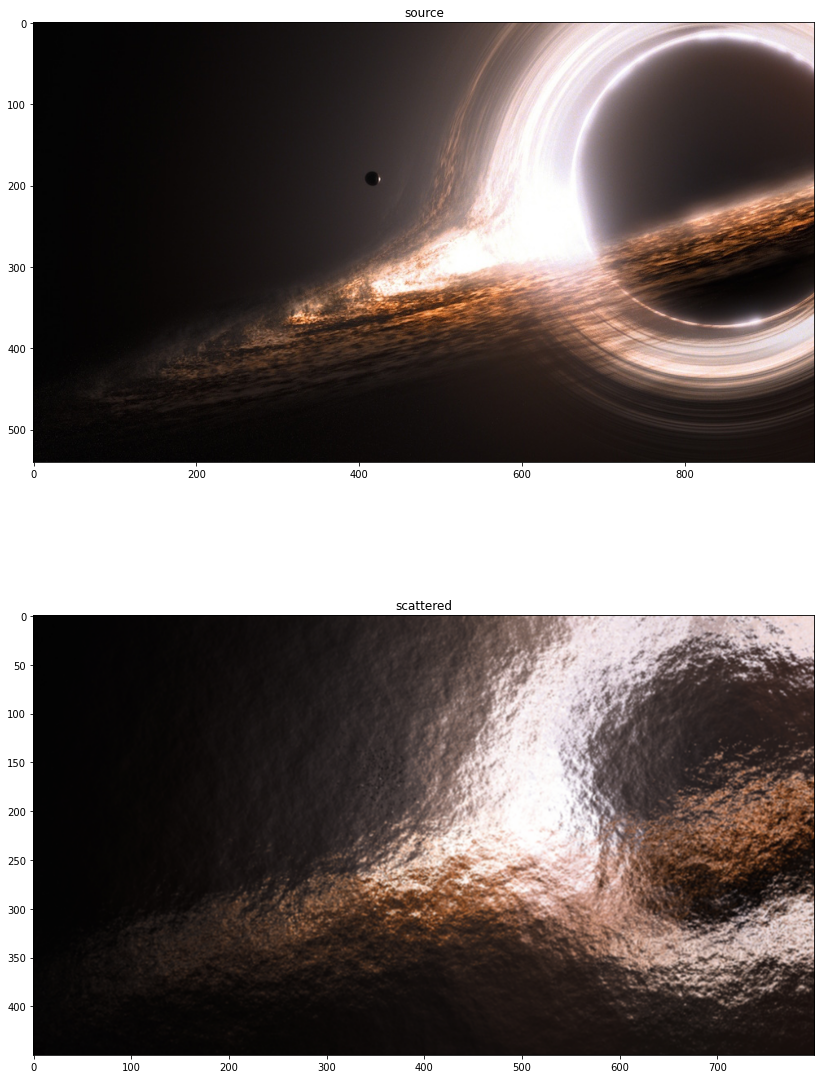

In [12]:
if doExample:
    rgb_uint8 = (np.dstack((rs,gs,bs)) * 255.).astype(np.uint8)
    
    plt.figure(figsize=(14,20))
    plt.subplot(211)
    plt.imshow(model[:,:,:])
    plt.title('source')
    plt.subplot(212)
    plt.imshow(rgb_uint8)
    plt.title('scattered')

**Figure 7.7.4**: Fun colour example of a scattered RGB image of the black hole sillhouette of *Gargantua* (from the movie *Interstellar*).

If you increase the wavelength of the observation, or decrease the frequency (see input to *slimscat.generate_screen*), you'll see how interstellar scattering can be a major barrier to successfully measuring the shadow of a black hole with the Event Horizon Telescope! See [the EHT webpage &#10142;](http://www.eventhorizontelescope.org/) for more details on this project. 

### 7.7.2 Ionosphere <a id='instrum:sec:ion'></a><!--\label{instrum:sec:ion}-->

The ionosphere is a layer of ionized plasma with an altitude range of 60-1000 km above sea level. It is mostly driven by ultraviolet photons from the Sun, which ionize the upper layers of the atmosphere. As a result, there is a natural diurnal cycle, with the layers nearest the Sun being the mostly highly ionized. This level of ionization is measured with the unit Total Electron Content (TEC), where 1 TEC unit (TECU) = $10^{16}$ m$^{-2}$. a major barrier to successfully measuring the shadow of a black hole with the Event Horizon Telescope! Figre 7.7.5 shows a global map with the TEC values at a given time, showing that this is most concentrated near the equator. 

![](figures/iono.png)

**Figure 7.7.5**: Total Electron Content above the Earth at given time, showing the enhancement towards the equatorial regions nearest the Sun. (Image credit: [astrosurf &#10142;](http://www.astrosurf.com/luxorion/qsl-review-propagation-software-research.htm)) <a id='instrum:fig:iono'></a><!--\label{instrum:fig:iono}-->


The ionosphere is a complex subject, and the object of intensive study in and of itself. We will just describe the primary (adverse) effects it has on radio observations. Like any plasma, the ionosphere has an *oscillation frequency*, or *plasma frequency*, given by $$\nu_p = \frac{e}{2\pi}\sqrt{\frac{n_e}{\epsilon_0 m}} \ \simeq 9\sqrt{n_e} \ \ {\rm (Hz)},$$ where $e, n_e, \epsilon_0$ are the electron charge, density and permitivity of free space respectively. A typical value for the ionosphere's plasma frequency is less than $\nu_p \sim 15$ MHz. Note than the ionosphere is opaque to any radiation below this frequency. While this disadvantage in low frequency observations of the Universe from Earth, it has also be used to aid long-distance radio communication by reflecting radio waves off the lower surface of the ionosphere. 

The free electrons in the ionosphere cause a propogation delay of an incident electro-magnetic wave, which can be represented as an "excess path length", $$L_0 \simeq -\frac{1}{2} \int^\infty_0 \left[ \frac{\nu_p(h)}{\nu}\right]^2 {\rm d}h, $$

where $h$ is the height above sea level. Note the $\nu^2$ dependance, which explains why the ionophere is a bigger problem for low radio frequency observations such as attempts to detect the epoch of reionization. Within the Jones matrix formalism, this delay can be represented as follows,

$$
\mathbf{Z} = Z = \left[ \begin{array}{cc}\mathrm{e}^{-2\pi \imath \tau / \lambda} & 0 \\ 0 & \mathrm{e}^{-2\pi \imath \tau / \lambda} \end{array} \right] = \mathrm{e}^{-2\pi \imath \tau / \lambda},
$$

which is of course the same as any other phase only effect, of which there are many described in this chapter. Although the $\mathbf{Z}$ Jones matrix has no amplitude effect, it is important to note that the variable or differential delay imposed by the ionsphere result in a loss of coherence if data are averaged on timescales larger than the local dynamic timescale for the ionosphere (seconds to tens of minutes). It is this loss of coherence that also results in an amplitude loss as described in the previous section.  

![](figures/Atmosphere_with_Ionosphere.png)

**Figure 7.7.6**: Comparison of atmospoheric and ionospheric temperature and density profiles as a function of height above sea level. <a id='instrum:fig:Atmosphere_With_Ionosphere'></a><!--\label{instrum:fig:Atmosphere_With_Ionosphere}-->


For a given observing frequency, the extent to which the ionosphere corrupts the measured visibilies and the ease with which one can correct for its effects depends on the array geometry and station field of view (FoV). These can be best summarized as follows:

1. **small array, small FoV:** strong phase coherence across array and FoV
1. **large array, small FoV:** some/no phase coherence across array, strong phase coherence across FoV
1. **large array, small FoV:** strong phase coherence across array, some phase coherence across FoV
1. **large array, large FoV:** some/no phase coherence across array, some phase coherence across FoV

Actual scales for the descriptions above depend on the observing frequencies and ionospheric turbulence. However, at a few hundred MHz, indicative values for "small arrays" can be given for baselines less than 1 km: an indicative value of a "small Fov" is < 10 arcmin$^2$. Cases 3 and 4 above demand that direction dependent calibration be performed to accurately solve for the ionospheric effects. This is an active field research due to the slew of low frequency, wide FoV instruments currently being designed or built.

![](figures/iono_regimes.png)

**Figure 7.7.7**: Four different radio array regimes with regard to ionospheric calibration (see text). Credit: Huib Intema (2013 Lorentz Center presentation). <a id='instrum:fig:iono_regimes'></a><!--\label{instrum:fig:iono_regimes}-->

### 7.7.3 Trophosphere <a id='instrum:sec:propagation'></a> <!--\label{instrum:sec:propagation}-->

This is the lowest layer of the neutral atmosphere and has typical scale height of 2 km. The refractivity of water vapour in this layer at radio wavelengths is of order 20x greater than in the optical/near-infrared (recall that typical "seeing" in the optical window is ~1 arcsec). Water vapour is poorly mixed in this layer, and phase fluctuations are introduced due to the resulting refractive index inhomogenities. The delay due to a non-unity refractive index ($n$) is $$\Delta t = \frac{1}{c} \int (n - 1) dy, $$ where c is the speed of light and the refractive path length is the geodesic (i.e. here, a straight line). The refractivity of moist air is described by the empirical formula $$N = 77.6\frac{p_D}{T} + 64.8\frac{p_V}{T} + 3.776 \times 10^5 \frac{p_V}{T^2}, $$ where the refractivity is $N \equiv 10^6(n-1)$, $T$ is the temperature in Kelvins, and $p_D$ and $p_V$ are the partial pressures of dry air and water vapor respectively. Since the atmosphere obeys the equation of hydrostatic equilibrium (to a good approximation), it is clear that to zeroth order, the trosphere's refractive index will have some dependence on time-of-day, time-of-season, site altitude and latitude. Note that water vapour is not well mixed in the atmosphere, and is therefore not well correlated with ground-based meteorological parameters.

![](figures/total_precipitable_water_201008.jpg)

**Figure 7.7.8.** Map of the Earth showing water vapour content during August 2010. (NASA image by Robert Simmon) <a id='instrum:fig:total_precipitable_water_201008'></a><!--\label{instrum:fig:total_precipitable_water_201008}-->


The troposphere has several effects on high frequency ($>> 10$~GHz) radio observations, the most important (or detrimental) being:

1. absorption
2. refraction 
3. turbulence-induced scattering

*Absorption* (also known as the *opacity*) is due to pressure-broadened molecular resonances in water vapour, oxygen and ozone. There are a series of strong water vapour lines between 100 GHz to 1 THz. This explains the need for building millimetre observatories at high altitudes ($>2$ km), where several atmospheric windows are accessible (see Figure 7.8.2). 

The mean refraction is an effect that must be corrected in the telescope pointing, and increasingly so at low elevation. However, small-scale tropospheric turbulence results in rapid phase fluctuations, significantly limiting telescope sensitivity. At $>$100 GHz, coherence times are limited to $\sim$10 seconds, even for the best sites in the world. 

The power spectrum of these phase fluctuations are usually described as a Kolmogorov turbulent screen, with a phase structure function defined as:

$$D_\phi(d) = \ <[\Phi(x) - \Phi(x - d)]^2>, $$ 


where $\Phi(x)$ is the phase at point $x$, $\Phi(x-d)$ is the phase at point $x-d$, and the angle brackets represent the ensemble average. This implies that the closer two points are to one another, the more similar their phase delay will be. The literature covering this subject is truly vast, and will not be covered in further detail here, but the keen reader is encouraged to refer to Thompson et al. 2001, and reference therein.

In terms of the Jones matrix formalism, the troposhere is equivalent to the ionosphere, with an additional amplitude loss term due to non-zero atmospheric opacity. 

![](figures/ALMAatmo.jpg)

**Figure 7.7.9.** Transmission curves (fraction of radiation that is able to traverse a medium) above the ALMA site Chajnantor. The lines correspond to the frequency coverage of the ALMA receiver bands (1-10).  (Image credit: [ESO &#10142;](http://www.eso.org/sci/facilities/alma/documents.html)) <a id='instrum:fig:ALMAatmo'></a><!--\label{instrum:fig:ALMAatmo}-->


There are different regimes of atmospheric phase corruption. One extreme case is when two antennas look through the exact same atmosphere, and the other extreme is VLBI baselines, where the weather above two antennas would be entirely un-correlated. The figure below shows the level of phase-correlation above the Very Large Array as a function of baseline length. The changes in slopes map the changes of the atmospheric structure function. 

![](figures/carilli_holdaway1999.png)

**Figure 7.7.10.** Root phase structure function based on BnA array VLA 22 GHz observations. Open circles show the phase rms versus baseline length towards a 1 Jy calibrator source (0748+240) over the course of 90 minutes. The filled squares show the same values with a constant noise value of 10$^\circ$ subtracted in quadrature, revealing the underlying tropospheric structure functions. All three regimes are predicted by Kolmogorov turbulence theory. (Image credit: Carilli & Holdaway 1999) <a id='instrum:fig:carilli_holdaway1999'></a><!--\label{instrum:fig:carilli_holdaway1999}-->

***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [7. Observing Systems](7_0_introduction.ipynb)  
    * Previous: [7.6 Polarization and Antenna Feeds](7_6_polarization.ipynb)
    * Next: [7.8 Radio Frequency Interference (RFI)](7_8_rfi.ipynb)
    
***